In [1]:
"""
Regression with Airfoil data -- UCI dataset -- 398 data rows
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

Original 1503 rows; 6 columns, no missing data
"""

'\nRegression with Airfoil data -- UCI dataset -- 398 data rows\nhttps://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise\n\nOriginal 1503 rows; 6 columns, no missing data\n'

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model as lm

In [11]:
af_df = pd.read_table("airfoil_self_noise.txt", header=None)
af_df.columns = ["frequency", "angle_attack", "chord_length", "velocity", "displacement", "sound_dbs" ]

In [13]:
print("Dataframe shape: ",af_df.shape,"\n")
print("Dataframe head")
print(af_df.head(), "\n")

print("Data Frame Stats:\n", af_df.describe())

Dataframe shape:  (1503, 6) 

Dataframe head
   frequency  angle_attack  chord_length  velocity  displacement  sound_dbs
0        800           0.0        0.3048      71.3      0.002663    126.201
1       1000           0.0        0.3048      71.3      0.002663    125.201
2       1250           0.0        0.3048      71.3      0.002663    125.951
3       1600           0.0        0.3048      71.3      0.002663    127.591
4       2000           0.0        0.3048      71.3      0.002663    127.461 

Data Frame Stats:
           frequency  angle_attack  chord_length     velocity  displacement  \
count   1503.000000   1503.000000   1503.000000  1503.000000   1503.000000   
mean    2886.380572      6.782302      0.136548    50.860745      0.011140   
std     3152.573137      5.918128      0.093541    15.572784      0.013150   
min      200.000000      0.000000      0.025400    31.700000      0.000401   
25%      800.000000      2.000000      0.050800    39.600000      0.002535   
50%     16

In [14]:
# Normalizing af_df
from sklearn import preprocessing
af_float_array = af_df.values.astype(float)
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
scaled_stand = standard_scaler.fit_transform(af_float_array)
scaled_minmax = min_max_scaler.fit_transform(af_float_array)
af_df_sscale = pd.DataFrame(scaled_stand,columns = 
                            ["frequency", "angle_attack", "chord_length", "velocity", "displacement", "sound_dbs"])
af_df_mmscale = pd.DataFrame(scaled_minmax,columns = 
                            ["frequency", "angle_attack", "chord_length", "velocity", "displacement", "sound_dbs"])

print("Dataframe shape: ",af_df_sscale.shape,"\n") # 392 rows, 7 columns + header

Dataframe shape:  (1503, 6) 



In [15]:
print(af_df_sscale[0:5])

   frequency  angle_attack  chord_length  velocity  displacement  sound_dbs
0  -0.662023     -1.146403      1.799299  1.312935     -0.644805   0.197939
1  -0.598561     -1.146403      1.799299  1.312935     -0.644805   0.052935
2  -0.519235     -1.146403      1.799299  1.312935     -0.644805   0.161688
3  -0.408177     -1.146403      1.799299  1.312935     -0.644805   0.399494
4  -0.281255     -1.146403      1.799299  1.312935     -0.644805   0.380644


In [16]:
print(af_df_mmscale[0:5])

   frequency  angle_attack  chord_length  velocity  displacement  sound_dbs
0   0.030303           0.0           1.0       1.0      0.039005   0.606829
1   0.040404           0.0           1.0       1.0      0.039005   0.580238
2   0.053030           0.0           1.0       1.0      0.039005   0.600181
3   0.070707           0.0           1.0       1.0      0.039005   0.643790
4   0.090909           0.0           1.0       1.0      0.039005   0.640333


D:\program_files2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C82EDAF98>,
      dtype=object)

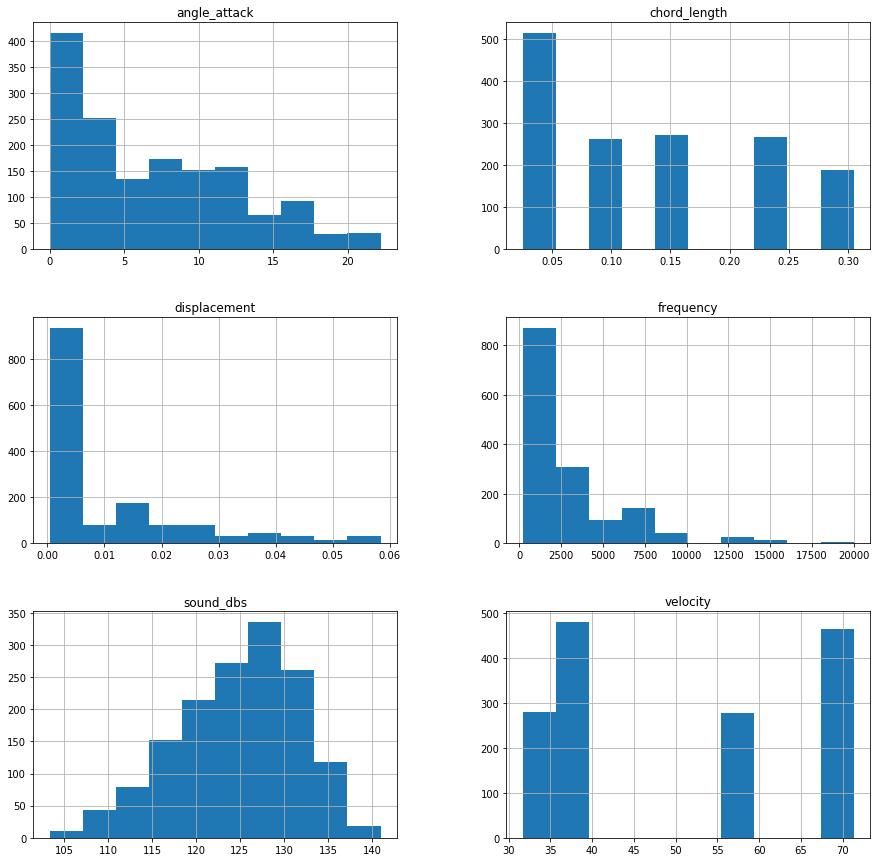

In [20]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
af_df.hist(ax = ax)

D:\program_files2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C832DA2B0>,
      dtype=object)

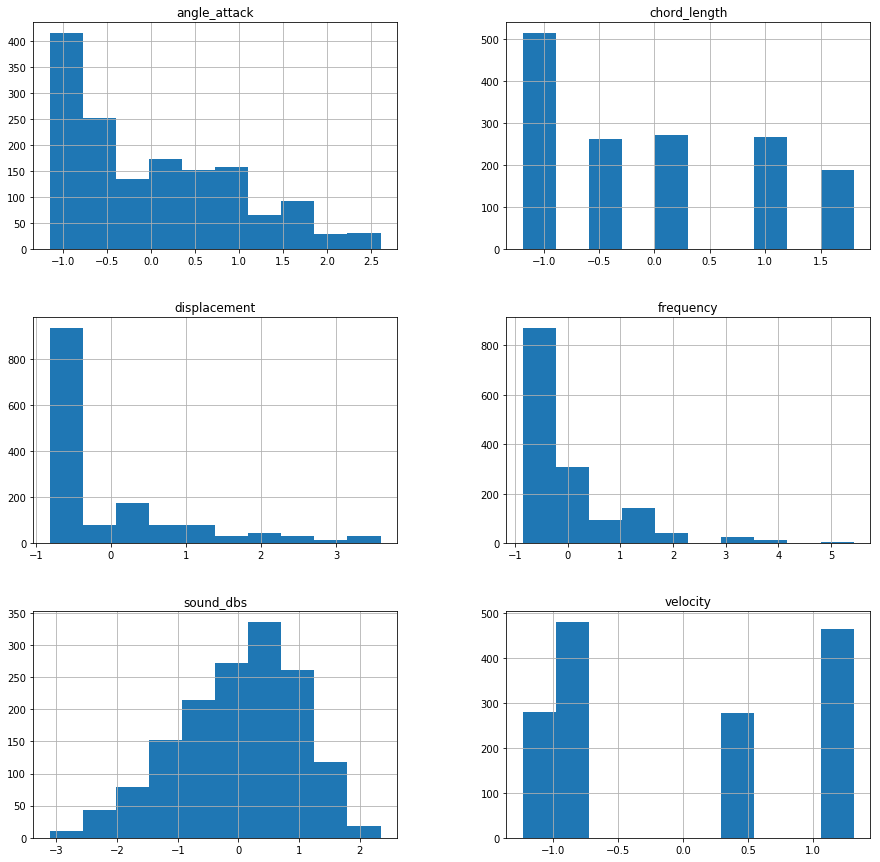

In [21]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
af_df_sscale.hist(ax = ax)

D:\program_files2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C849196D8>,
      dtype=object)

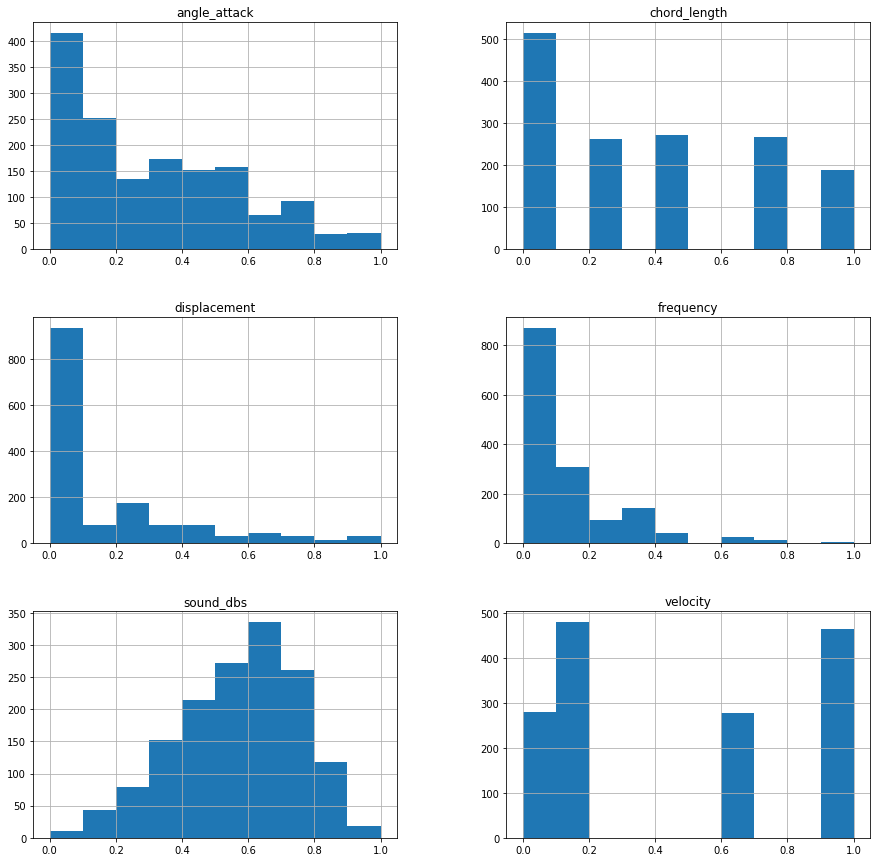

In [22]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
af_df_mmscale.hist(ax = ax)

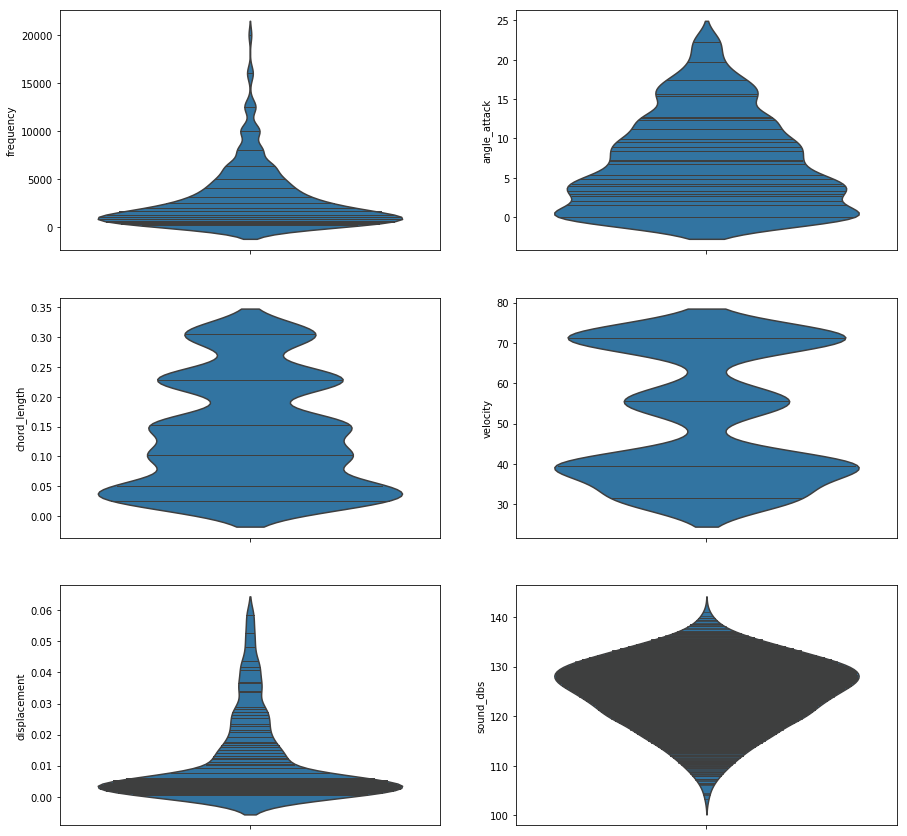

In [40]:
# draw some violin plots for variables
fig = plt.figure(figsize = (15,15))
plt.figure(1)
plt.subplot(321)
sns.violinplot( y="frequency", data=af_df, inner="stick")
plt.subplot(322)
sns.violinplot( y="angle_attack", data=af_df, inner="stick")
plt.subplot(323)
sns.violinplot( y="chord_length", data=af_df, inner="stick")
plt.subplot(324)
sns.violinplot( y="velocity", data=af_df, inner="stick")
plt.subplot(325)
sns.violinplot( y="displacement", data=af_df, inner="stick")
plt.subplot(326)
sns.violinplot( y="sound_dbs", data=af_df, inner="stick")



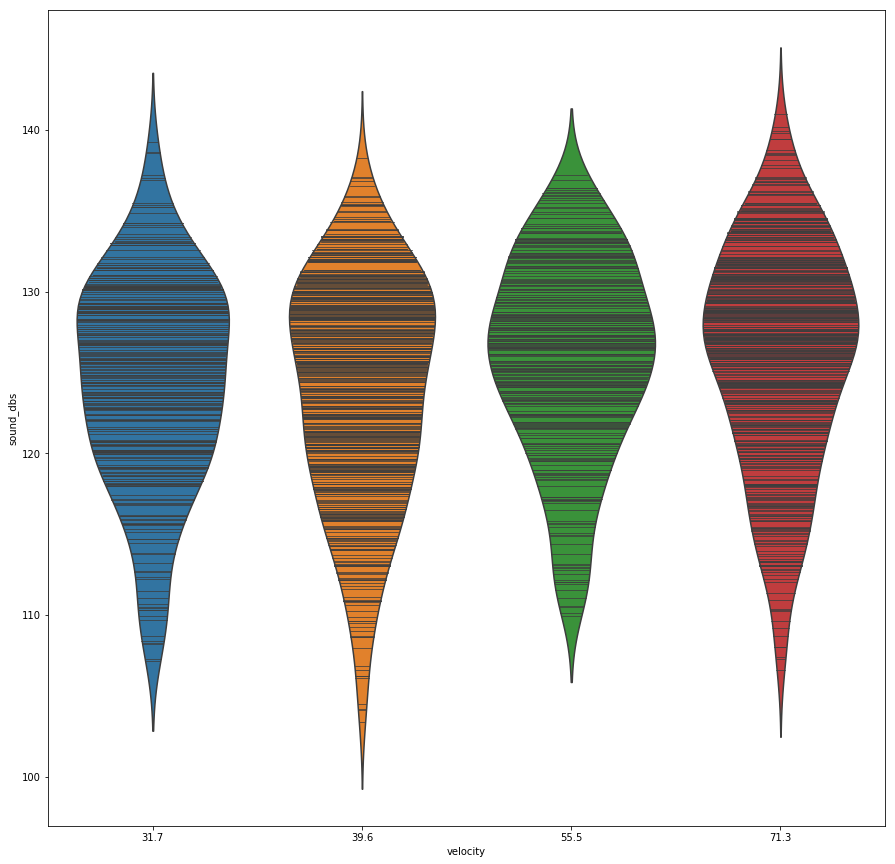

In [44]:
fig = plt.figure(figsize = (15,15))
sns.violinplot( y="sound_dbs", x="velocity", data=af_df, inner="stick")


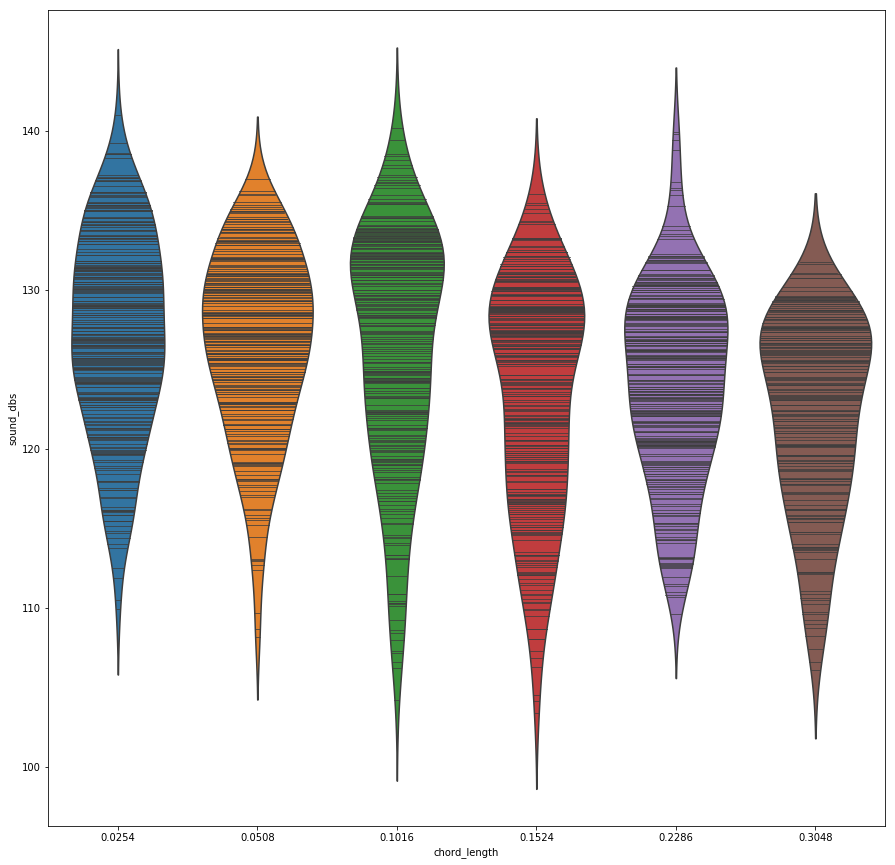

In [45]:
fig = plt.figure(figsize = (15,15))
sns.violinplot( y="sound_dbs", x="chord_length", data=af_df, inner="stick")


In [46]:
corr_matrix = af_df.corr()
print(corr_matrix)

              frequency  angle_attack  chord_length  velocity  displacement  \
frequency      1.000000     -0.272765     -0.003661  0.133664     -0.230107   
angle_attack  -0.272765      1.000000     -0.504868  0.058760      0.753394   
chord_length  -0.003661     -0.504868      1.000000  0.003787     -0.220842   
velocity       0.133664      0.058760      0.003787  1.000000     -0.003974   
displacement  -0.230107      0.753394     -0.220842 -0.003974      1.000000   
sound_dbs     -0.390711     -0.156108     -0.236162  0.125103     -0.312670   

              sound_dbs  
frequency     -0.390711  
angle_attack  -0.156108  
chord_length  -0.236162  
velocity       0.125103  
displacement  -0.312670  
sound_dbs      1.000000  


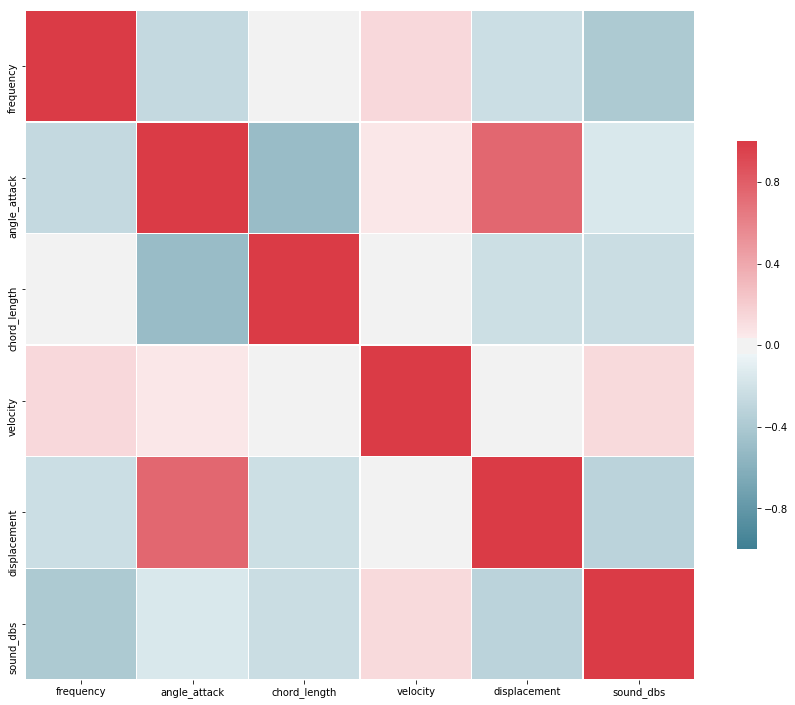

In [84]:
# use seaborn heatmap to generate correlation matrix


fig = plt.figure(figsize = (15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.color_palette("RdBu_r")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [55]:
X = af_df_mmscale.drop('sound_dbs',axis=1)
y = af_df_mmscale['sound_dbs']
X1 = af_df_sscale.drop('sound_dbs',axis=1)
y1 = af_df_sscale['sound_dbs']

In [80]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=55)
print("X_train shape: ",X_train.shape) # 1127 rows, 5 columns
print("y_train shape: ",y_train.shape) # 1127 rows, 1 column
print("X_test shape: ",X_test.shape) # 376 rows, 5 columns
print("y_test shape: ",y_test.shape) # 376 rows, 1 column
# print(y_train)

X_train shape:  (1127, 5)
y_train shape:  (1127,)
X_test shape:  (376, 5)
y_test shape:  (376,)


In [93]:
# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": lm.LinearRegression(),
            "Ridge_0_1": lm.Ridge(alpha=0.1),
            "Ridge_0_5": lm.Ridge(alpha=0.5),
            "Ridge_2_0": lm.Ridge(alpha=2.0),
            "Lasso_0_01": lm.Lasso(alpha=0.01),
            "Lasso_0_05": lm.Lasso(alpha=0.05),
            "Lasso_0_1": lm.Lasso(alpha=0.1),
            "LassoLars_0_01": lm.LassoLars(alpha=0.01),
            "LassoLars_0_05": lm.LassoLars(alpha=0.05),
            "LassoLars_0_1": lm.LassoLars(alpha=0.1),
            "BayesianRidge": lm.BayesianRidge(),
            "ElasticNet": lm.ElasticNet(alpha=0.1),
            "KNeighborsRegressor_3": KNeighborsRegressor(n_neighbors=3),
            "KNeighborsRegressor_5": KNeighborsRegressor(n_neighbors=5),
            "KNeighborsRegressor_2": KNeighborsRegressor(n_neighbors=2),
            "KNeighborsRegressor_4": KNeighborsRegressor(n_neighbors=4)}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge_0_1', 'Ridge_0_5', 'Ridge_2_0', 'Lasso_0_01', 'Lasso_0_05', 'Lasso_0_1', 'LassoLars_0_01', 'LassoLars_0_05', 'LassoLars_0_1', 'BayesianRidge', 'ElasticNet', 'KNeighborsRegressor_3', 'KNeighborsRegressor_5', 'KNeighborsRegressor_2', 'KNeighborsRegressor_4'])


In [94]:
# Model test using min max scaler
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mse(y_predict, y_test)
    score_r2 = r2_score(y_predict, y_test)
    print(regression_model,"  RMSE:",math.sqrt(regression_model_mse),"   R2 Score:",score_r2)

Linear_Regression   RMSE: 0.12519627261596591    R2 Score: 0.08039011782078909
Ridge_0_1   RMSE: 0.1251855219550957    R2 Score: 0.07421522510017542
Ridge_0_5   RMSE: 0.1251625183487675    R2 Score: 0.04914993930155365
Ridge_2_0   RMSE: 0.1253159648152125    R2 Score: -0.04987862598337278
Lasso_0_01   RMSE: 0.16454319083079666    R2 Score: -43.71807397271304
Lasso_0_05   RMSE: 0.1792090378457671    R2 Score: -6.51387417640788e+29
Lasso_0_1   RMSE: 0.1792090378457671    R2 Score: -6.51387417640788e+29
LassoLars_0_01   RMSE: 0.1792090378457671    R2 Score: -6.51387417640788e+29
LassoLars_0_05   RMSE: 0.1792090378457671    R2 Score: -6.51387417640788e+29
LassoLars_0_1   RMSE: 0.1792090378457671    R2 Score: -6.51387417640788e+29
BayesianRidge   RMSE: 0.12518299809874855    R2 Score: 0.07255822237889042
ElasticNet   RMSE: 0.1792090378457671    R2 Score: -6.51387417640788e+29
KNeighborsRegressor_3   RMSE: 0.07310367559048732    R2 Score: 0.790173908022051
KNeighborsRegressor_5   RMSE: 0.087

In [95]:
# Model test using standard scaler 
# Added R2 scoring to have a standardized score to compare two scaling methods
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X1_train,y1_train)
    y1_predict = regressor.predict(X1_test)
    regression_model_mse = mse(y1_predict, y1_test)
    score_r2 = r2_score(y1_predict, y1_test)
    print(regression_model,"  RMSE:",math.sqrt(regression_model_mse),"   R2 Score:",score_r2)

Linear_Regression   RMSE: 0.6827160055604093    R2 Score: 0.08039011782078831
Ridge_0_1   RMSE: 0.6827113567658463    R2 Score: 0.08013507109999829
Ridge_0_5   RMSE: 0.6826929965843217    R2 Score: 0.0791142462027854
Ridge_2_0   RMSE: 0.6826274603430448    R2 Score: 0.07527706679063151
Lasso_0_01   RMSE: 0.6820162903545797    R2 Score: 0.009835835673471571
Lasso_0_05   RMSE: 0.6912842974281594    R2 Score: -0.4135075752593287
Lasso_0_1   RMSE: 0.7286660751817742    R2 Score: -1.5205467974469795
LassoLars_0_01   RMSE: 0.9578108197718984    R2 Score: -388.5824020593144
LassoLars_0_05   RMSE: 0.9772565582178806    R2 Score: 0.0
LassoLars_0_1   RMSE: 0.9772565582178806    R2 Score: 0.0
BayesianRidge   RMSE: 0.6825906493121351    R2 Score: 0.07297009967236778
ElasticNet   RMSE: 0.699866480946255    R2 Score: -0.6746976706965124
KNeighborsRegressor_3   RMSE: 0.380812188526055    R2 Score: 0.8155635014501077
KNeighborsRegressor_5   RMSE: 0.43606039210174036    R2 Score: 0.7124606789509893
KNe

In [139]:
# my best modde was a KNN regressor, so it won't have .coef_ or _intercept
knn = KNeighborsRegressor(n_neighbors=2)
# training over the entire dataset to create model for new predictions
# Using Standard Scale data minus last data point for testing.
# I want to use all the data available when building a model for new
# predictions
knn.fit(X1[:len(X1)-1], y1[:len(y1)-1])
# create single test for prediction
test_data = np.array([af_df.iloc[1502,:]])
test_out = af_df.iloc[1502,5]
print(af_df.iloc[1502,:],test_data, test_out)


frequency       6300.000000
angle_attack      15.600000
chord_length       0.101600
velocity          39.600000
displacement       0.052849
sound_dbs        104.204000
Name: 1502, dtype: float64 [[6.30000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02 1.04204e+02]] 104.204


In [140]:
# rescale test data
test_transform = standard_scaler.transform(test_data) # apply the same transform
print("Normalized new test row :",test_transform)


Normalized new test row : [[ 1.08316459  1.49044302 -0.37373954 -0.72334483  3.17277251 -2.99171432]]


In [141]:
test_1 = list(test_transform[0][:5]) # Extract all values excluding sound_dbs
test_seq = [test_1] # make a list of list
test_result = knn.predict(test_seq) # apply model prediction
print("Test result MPG (still normalized): ",test_result[0]) # this is still normalized mpg result

Test result MPG (still normalized):  -2.671255469349855


In [145]:
test_transform[0][5] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",test_transform)
result = standard_scaler.inverse_transform(test_transform) # apply inverse transform
print("Final test result: ",result)
print("Predicted sound_dbs: ",result[0][5])
print("Actual sound_dbs: ", test_out)

Test row with predicted (still normalized):  [[ 1.08316459  1.49044302 -0.37373954 -0.72334483  3.17277251 -2.67125547]]
Final test result:  [[6.30000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02 1.06414e+02]]
Predicted sound_dbs:  106.41399999999999
Actual sound_dbs:  104.204
